# Initial EDA for the CoverMyMeds Corporate Project

Start by importing the libraries I will need

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import data

In [2]:
cmm_data = pd.read_csv('/home/ruggiec/Documents/git/CMM_Patient_Expenses/pharmacy_tx.csv')

In [3]:
cmm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


Data has a significant number of duplicate entries. Clean data by removing duplicates

In [4]:
cmm_data_no_dups = cmm_data.drop_duplicates()

In [5]:
cmm_data_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12561845 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 874.5+ MB


In [6]:
len(cmm_data)-len(cmm_data_no_dups)

1348399

### Create train/test split

In [7]:
cmm_train, cmm_test = train_test_split(cmm_data_no_dups, shuffle=True, 
                             random_state= 614, test_size=0.2)

In [8]:
cmm_train.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
3962160,2022-04-23,Pharmacy #29,M31.63,branded mamate,322463,3O71UTS,NaN,False,25.75
1161541,2022-02-06,Pharmacy #7,Z20.23,branded vivafastat,725700,327CKV,IOEAN1DWVV3Y,False,180.52
10643305,2022-10-12,Pharmacy #4,U41.19,generic foxivelule,322463,3O71UTS,NaN,False,12.22
10629491,2022-10-11,Pharmacy #31,K87.68,generic ribosatharin,664344,YFVIA,AJK5MZ25T9IA,False,12.37
10928718,2022-10-18,Pharmacy #6,G99.93,generic simarol,96934,S76J7V6,NaN,False,13.93


#### The rejected column may contain useful information but we should be careful about incorporating the cases in which rejected is True

In [27]:
cmm_train_nr = cmm_train[cmm_train['rejected']==False]

note: this was done after I created the 'name' column.

### Explore Data

#### Create a new column for private vs employer based insurance

In [9]:
cmm_train['private'] = cmm_train.group.isna().astype(int)

In [11]:
cmm_train.sample(10)

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,private
3533832,2022-04-13,Pharmacy #7,H36.57,branded antimab,322463,NaN,HO8HUGL,False,6.20,0
13537280,2022-12-18,Pharmacy #0,K32.86,branded dienulol,725700,327CKV,IOEAN1DWVV3Y,False,11.15,0
6098659,2022-06-19,Pharmacy #24,G51.87,branded prazinib,725700,BZ22Z2,ZOYKF0N5NEO,False,12.71,0
11505761,2022-11-02,Pharmacy #6,W50.87,generic lalol,664344,NaN,STGRDKR1J5RD,False,10.77,0
5332296,2022-05-30,Pharmacy #40,H36.57,branded semufolic,96934,S76J7V6,NaN,False,51.05,1
10008774,2022-09-25,Pharmacy #23,B45.03,branded masonic,691847,N098KI,6SP1DG,False,176.42,0
13046396,2022-12-08,Pharmacy #13,K32.86,generic cibroniudosin,725700,1UQC,NaN,False,13.39,1
13299819,2022-12-13,Pharmacy #2,U61.13,generic prazinib,160389,RB7UU,RS5RB3YA,False,10.39,0
1394670,2022-02-12,Pharmacy #0,I68.27,branded prazinib,664344,NaN,ZX2QUWR,False,6.84,0
1390007,2022-02-12,Pharmacy #11,V97.67,generic tanoclolol,725700,327CKV,IOEAN1DWVV3Y,False,6.50,0


#### What can we learn from the insurance type?

In [24]:
cmm_train.groupby('private')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
private,,,,,,,,
0,7230590.0,23.568333,39.849623,0.0,7.99,12.60,18.67,557.93
1,2818886.0,27.015524,42.746789,0.0,10.22,13.93,20.74,543.40


In [28]:
cmm_train_nr.groupby('private')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
private,,,,,,,,
0,6614857.0,25.762153,40.979148,3.45,10.01,14.11,19.19,557.93
1,2594928.0,29.347128,43.778626,3.40,10.72,13.99,22.10,543.40


A significant portion of the data set has private insurance and in general pay slightly more for their medication. 

#### Lets get some better info from the drug name

In [13]:
def is_it_generic(text):
    if text.split()[0] == 'generic':
        return 1
    else:
        return 0

In [14]:
def drug_name(text):
    return text.split()[1]

In [15]:
cmm_train['generic'] = cmm_train.drug.apply(is_it_generic)

In [16]:
cmm_train['name'] = cmm_train['drug'].apply(drug_name)

In [17]:
cmm_train.sample(10)

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,private,generic,name
1051964,2022-02-03,Pharmacy #17,G99.93,generic rulfalol,725700,1UQC,NaN,False,7.39,1,1,rulfalol
2665133,2022-03-19,Pharmacy #0,Q72.66,branded ratin,664344,DY4B,NaN,False,47.45,1,0,ratin
1262037,2022-02-09,Pharmacy #28,H36.57,branded antimab,322463,3O71UTS,NaN,False,19.46,1,0,antimab
3479459,2022-04-12,Pharmacy #43,U27.71,branded tovane,96934,S76J7V6,NaN,False,13.99,1,0,tovane
3931005,2022-04-22,Pharmacy #28,G51.87,branded prazinib,539437,NaN,1CAHL,False,7.27,0,0,prazinib
753698,2022-01-23,Pharmacy #28,G99.93,branded hozirol,691847,NC7EN,NaN,False,17.91,1,0,hozirol
9505253,2022-09-14,Pharmacy #18,P07.55,generic brede,96934,S76J7V6,NaN,False,8.01,1,1,brede
10854708,2022-10-16,Pharmacy #3,W50.87,branded tanoclolol,757349,NaN,9R3Z3QKDF3,False,16.65,0,0,tanoclolol
8144679,2022-08-12,Pharmacy #51,U60.52,generic keglusited,757349,MSCXSG,DGLGRYP,False,17.56,0,1,keglusited
7597008,2022-07-27,Pharmacy #39,H36.57,branded tocilic,96934,S76J7V6,NaN,False,24.43,1,0,tocilic


Generic drugs are generally cheaper. Branded drugs are represented at a higher rate in the data set.

In [23]:
cmm_train.groupby('generic')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
generic,,,,,,,,
0,6341534.0,32.116867,49.543950,0.0,10.54,16.29,27.68,557.93
1,3707942.0,11.568800,5.277187,0.0,7.39,10.72,15.47,63.25


In [29]:
cmm_train_nr.groupby('generic')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
generic,,,,,,,,
0,5520422.0,36.893955,51.414560,4.26,12.32,17.37,37.07,557.93
1,3689363.0,11.627058,5.226047,3.40,7.43,10.72,15.47,63.25


Generic drugs are rejected sometimes but not at the same rate as branded drugs

I like this plot to show the general difference between branded and generic drug costs.  Increasing the sample size may be something to play around with.

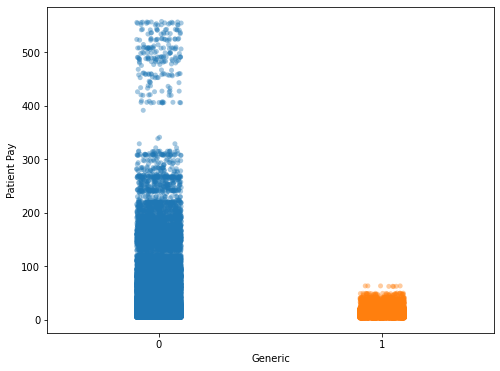

In [37]:
sample_size = 100000
sample = np.random.randint(0, len(cmm_train_nr), sample_size)

plt.figure(figsize=(8,6))

sns.stripplot(x='generic', y='patient_pay', data=cmm_train_nr.iloc[sample], alpha=0.4)
plt.ylabel('Patient Pay')
plt.xlabel('Generic')

plt.show()

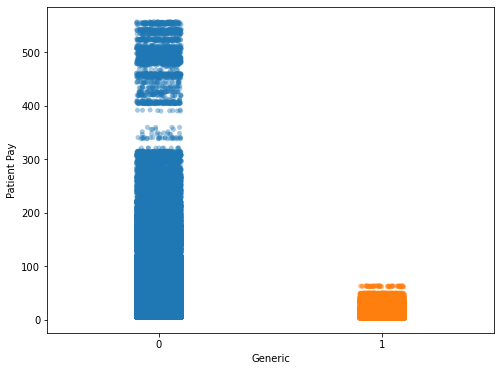

In [36]:
sample_size = 1000000
sample = np.random.randint(0, len(cmm_train_nr), sample_size)

plt.figure(figsize=(8,6))

sns.stripplot(x='generic', y='patient_pay', data=cmm_train_nr.iloc[sample], alpha=0.4)
plt.ylabel('Patient Pay')
plt.xlabel('Generic')

plt.show()

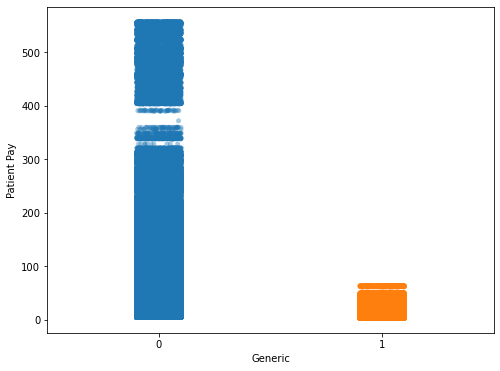

In [38]:
plt.figure(figsize=(8,6))

sns.stripplot(x='generic', y='patient_pay', data=cmm_train_nr, alpha=0.4)
plt.ylabel('Patient Pay')
plt.xlabel('Generic')

plt.show()

I find the gap in drug price at ~375 to ~400 interesting.

#### Why is there a difference in price between generic and brand drugs

In [67]:
cmm_train_nr.name.value_counts()

prazinib        919151
rulfalol        531018
pucomalol       406629
tanoclolol      381064
foxivelule      367822
                 ...  
dusin             5937
sizubesin         4590
gohevitravir      3248
lehydrome         1405
nenizevir          610
Name: name, Length: 77, dtype: int64

In [77]:
cmm_train_nr.groupby('generic')['name'].value_counts()[0]

name
prazinib        456110
rulfalol        264418
mule            262241
hidizuzunib     224060
tocilic         222058
                 ...  
fumiluric         5621
sizubesin         4590
lehydrome         1405
gohevitravir      1393
nenizevir          610
Name: name, Length: 77, dtype: int64

In [78]:
cmm_train_nr.groupby('generic')['name'].value_counts()[1]

name
prazinib           463041
rulfalol           266600
pucomalol          218423
tanoclolol         204525
foxivelule         191193
glycontazepelol    186602
dienulol           163568
ratin              137546
tovane             127179
cupitelol          118473
oxasoted           115982
momudobatin        109868
lalol              101091
keglusited         100796
colifunene          94912
gorol               87837
bovirol             83910
simarol             77874
tafistitrisin       74736
cibroniudosin       71087
hozirol             68981
ribosatharin        64821
glulune             60801
vocopirin           56808
sorine              56436
suvinicuvir         55028
cycloxasonol        52603
colade              49985
brede               48176
hivir               44694
satrade             44177
cicrochoric         38311
lixegimoric         19118
todiadianic         13120
thiostasteglume     11248
fumiluric            7958
gohevitravir         1855
Name: name, dtype: int64

All of the drugs have a branded version and the above list have both branded and generic

In [84]:
def plot_generic_brand(X):
    plt.figure(figsize=(8,6))

    sns.stripplot(x='generic', y='patient_pay', 
                  data=cmm_train_nr[cmm_train_nr['name']==X], alpha=0.4)
    plt.ylabel('Patient Pay')
    plt.xlabel('Generic')
    plt.title(X)
    
    plt.show()
    
    return

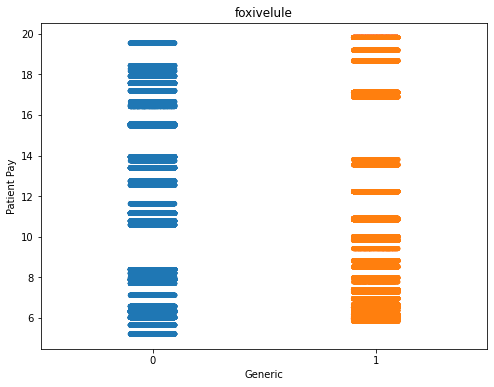

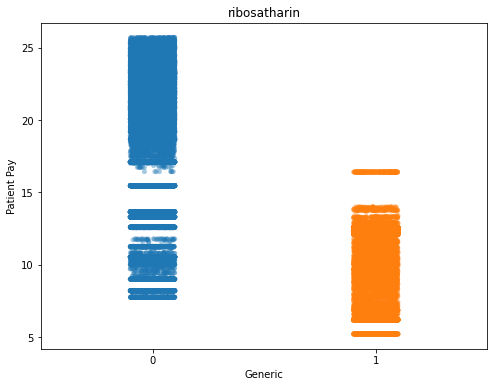

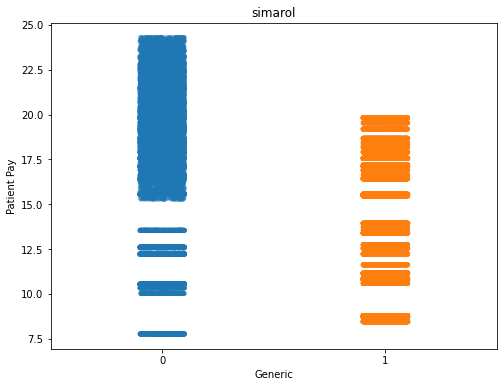

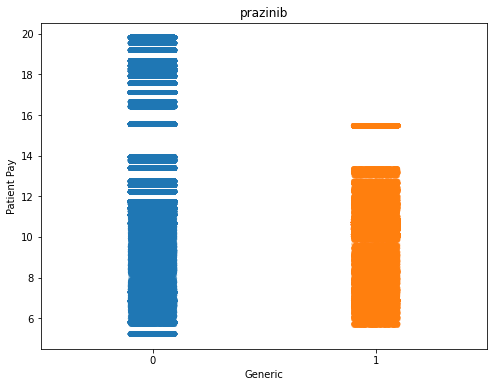

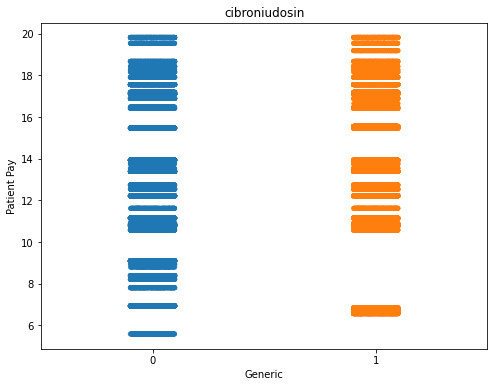

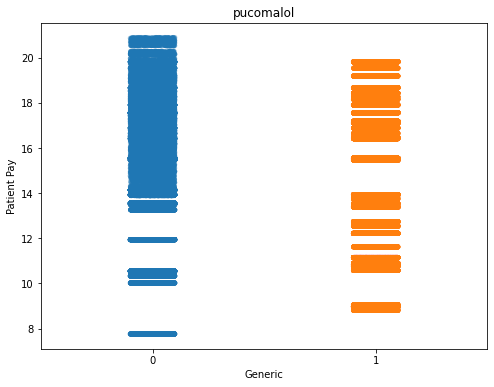

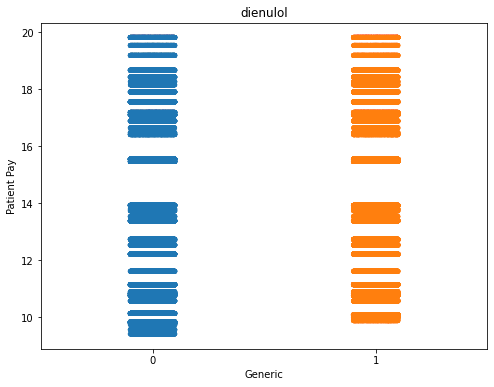

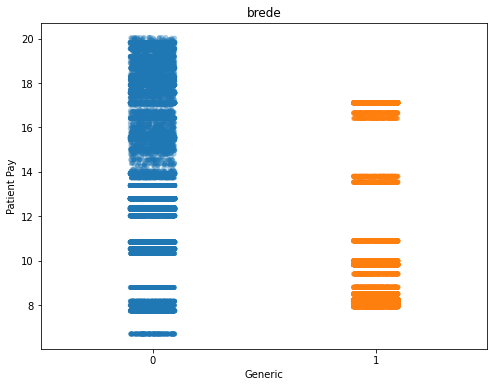

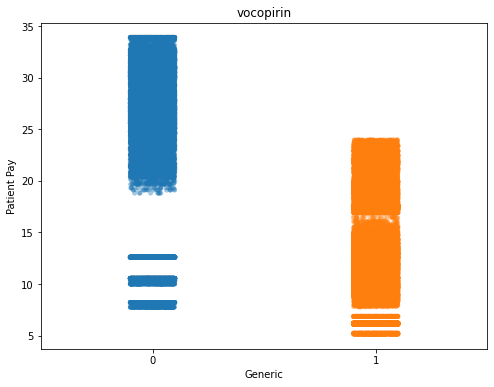

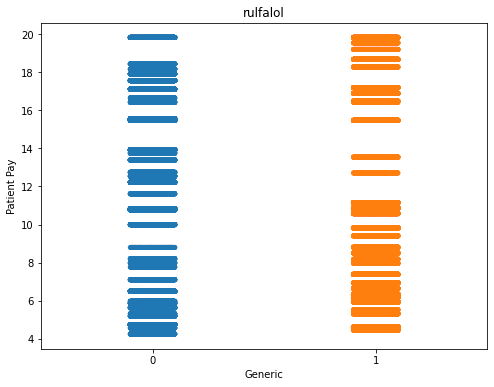

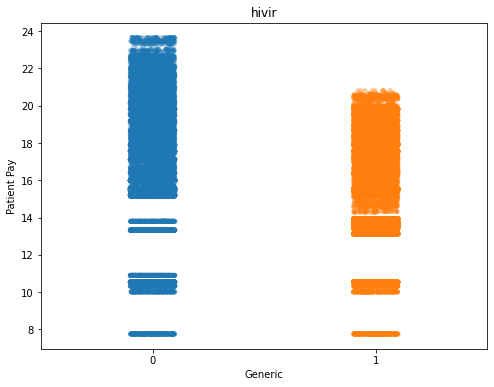

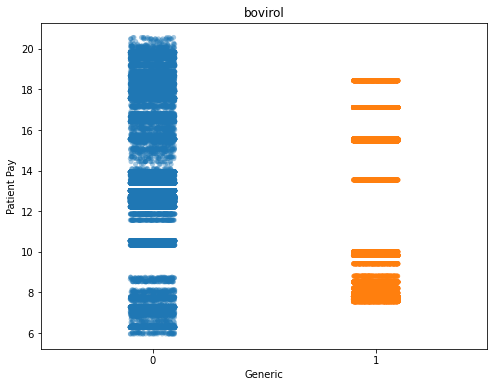

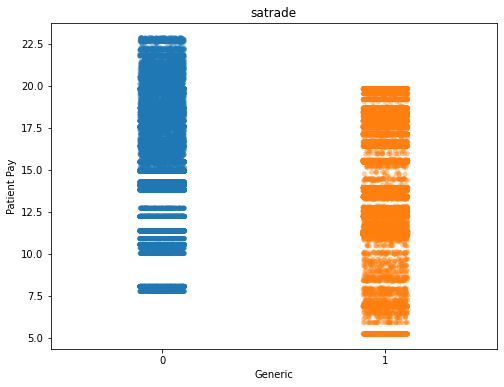

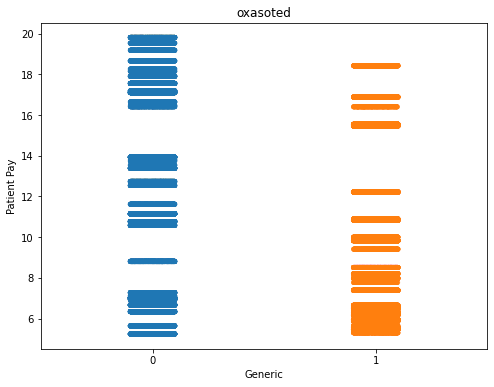

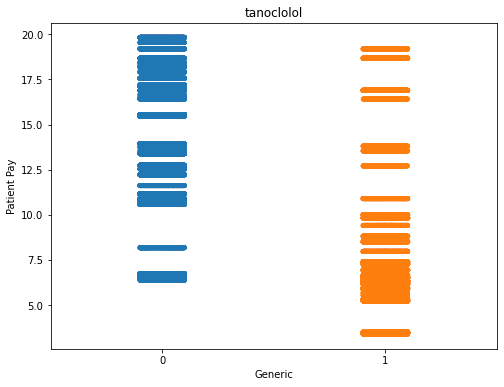

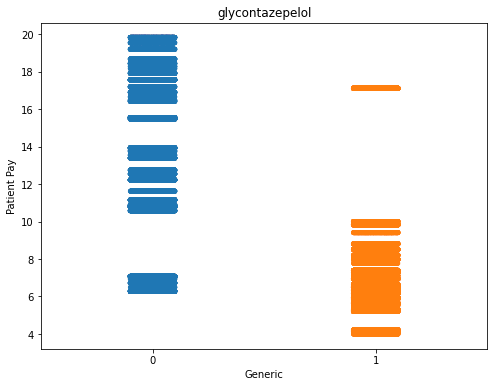

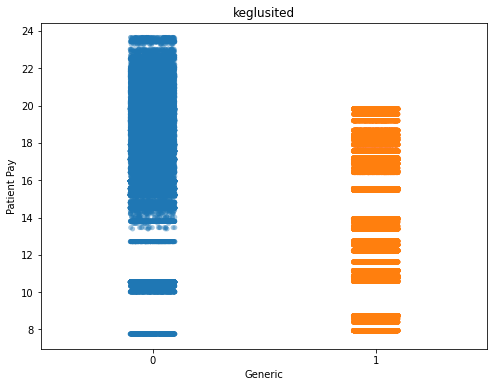

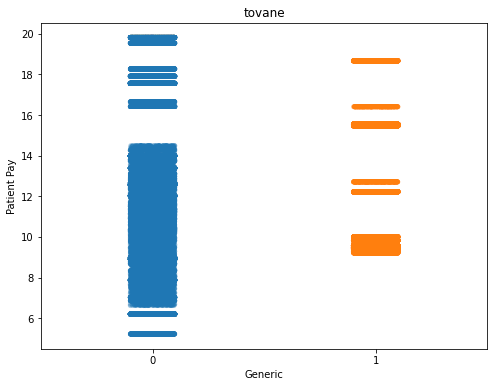

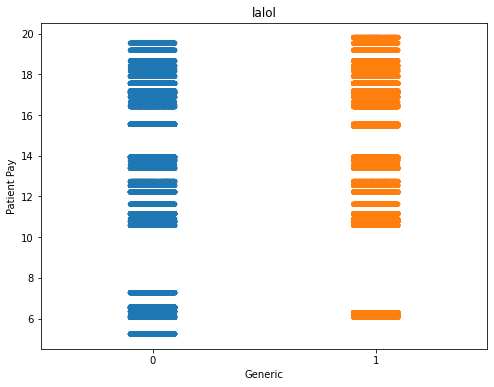

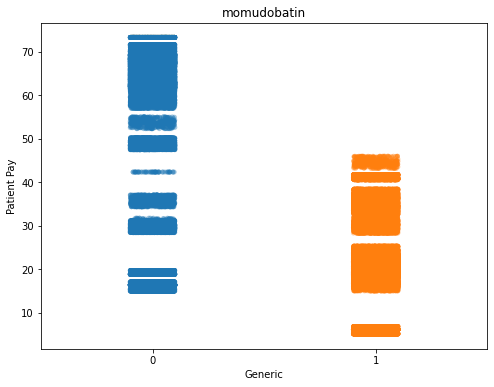

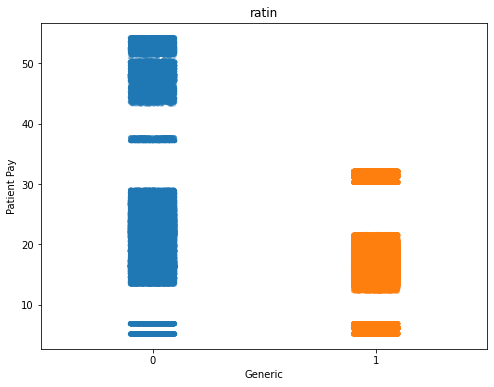

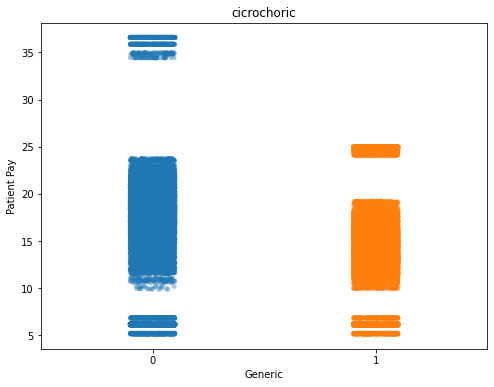

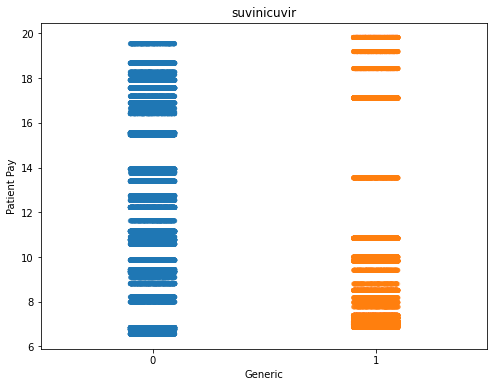

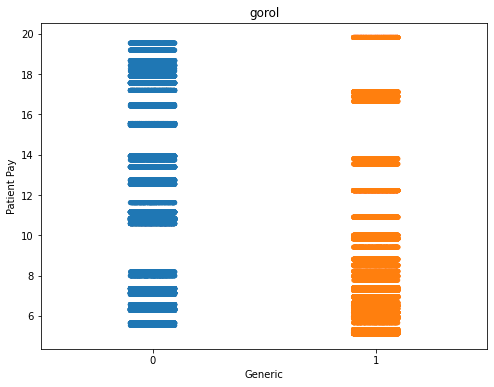

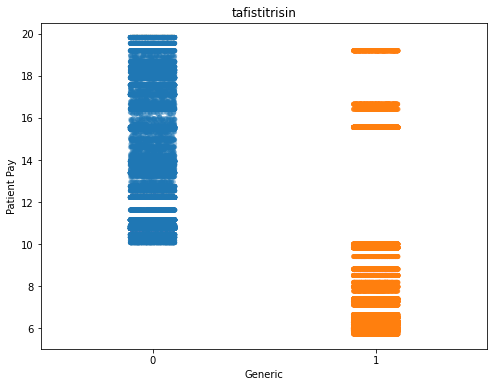

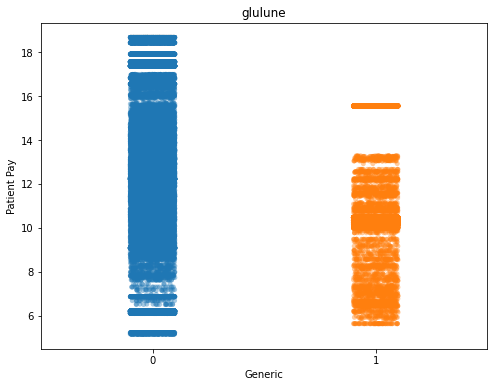

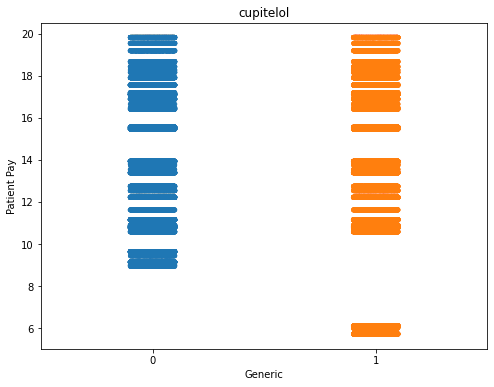

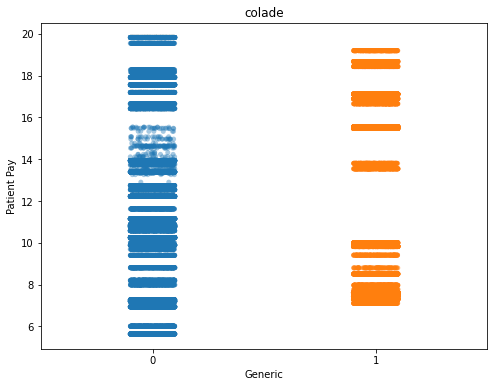

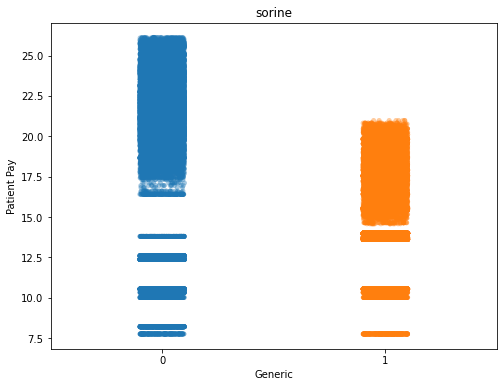

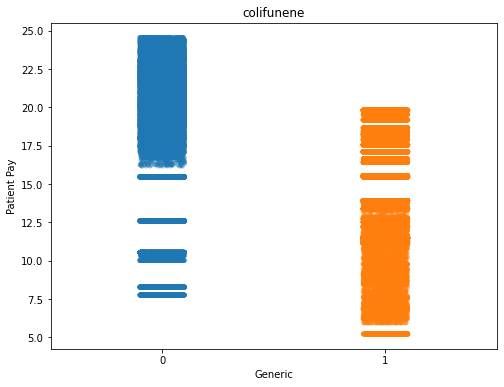

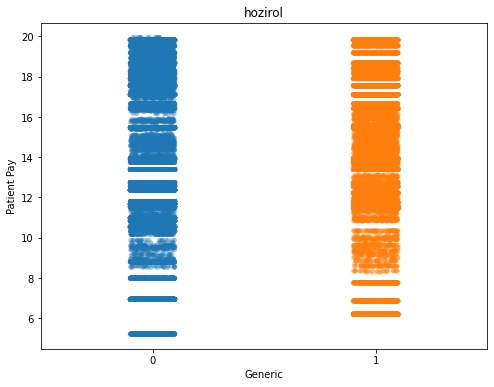

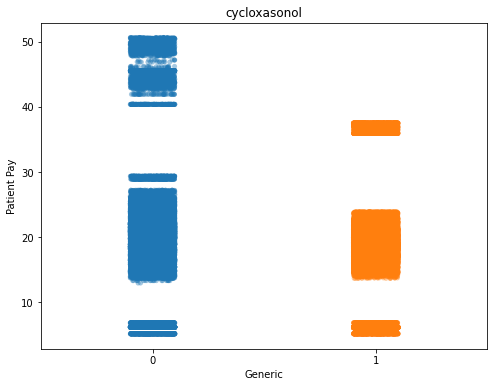

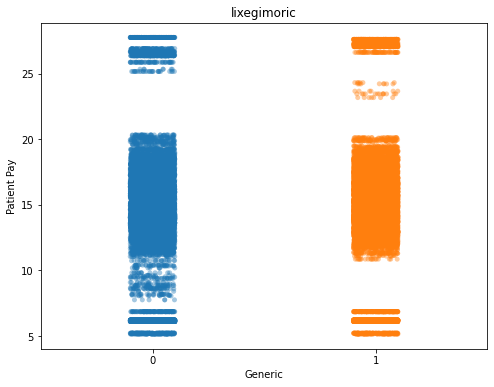

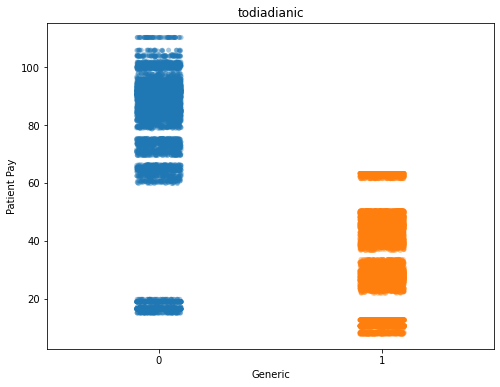

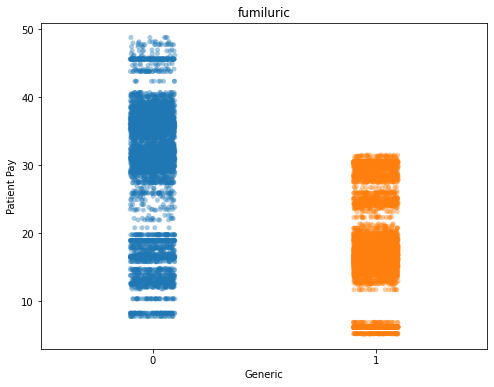

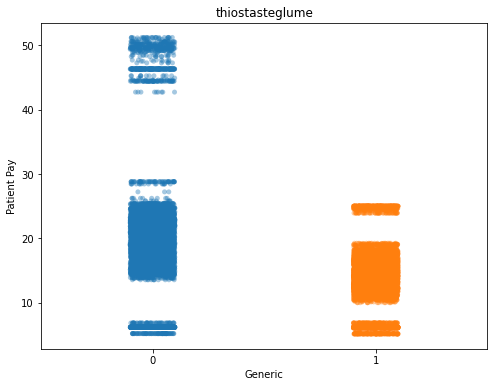

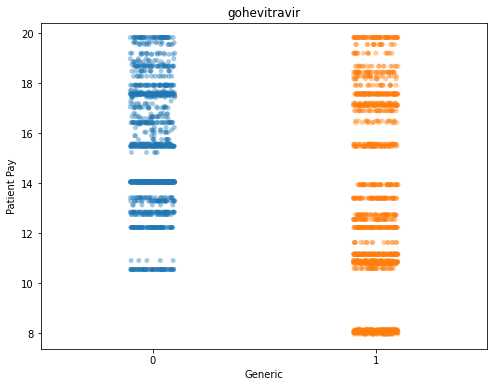

In [94]:
for X in cmm_train_nr[cmm_train_nr.generic==1]['name'].unique():
    plot_generic_brand(X)

In [95]:
generics = cmm_train_nr[cmm_train_nr.generic==1]['name'].unique()

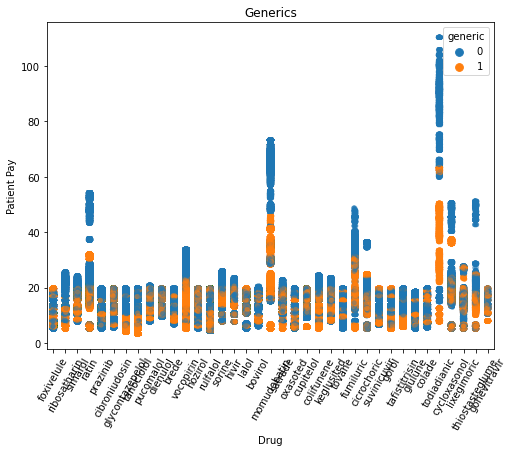

In [109]:
plt.figure(figsize=(8,6))

sns.stripplot(x='name', y='patient_pay', 
                data=cmm_train_nr[cmm_train_nr.name.isin(generics)], alpha=0.4, hue='generic')
plt.ylabel('Patient Pay')
plt.xlabel('Drug')
plt.xticks(rotation=60)
plt.title('Generics')
    
plt.show()

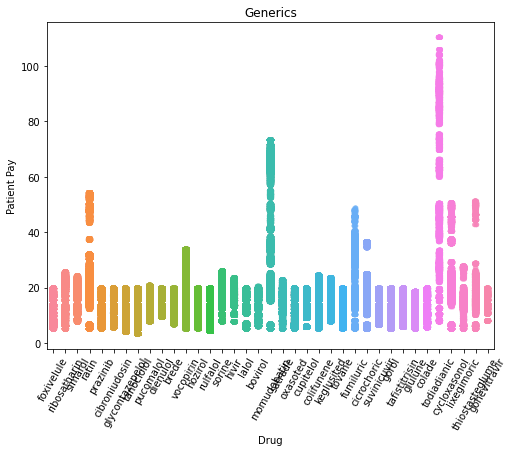

In [110]:
plt.figure(figsize=(8,6))

sns.stripplot(x='name', y='patient_pay', 
                data=cmm_train_nr[cmm_train_nr.name.isin(generics)], alpha=0.4)
plt.ylabel('Patient Pay')
plt.xlabel('Drug')
plt.xticks(rotation=60)
plt.title('Generics')
    
plt.show()

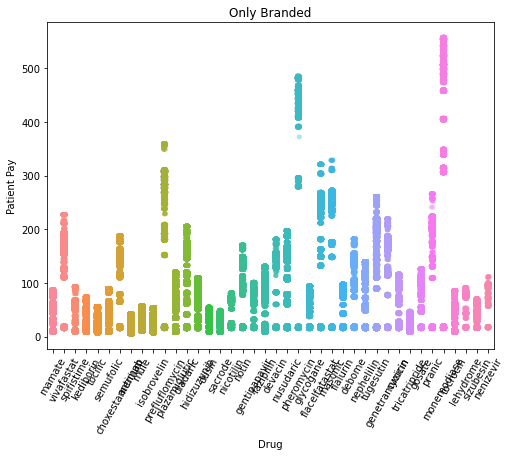

In [107]:
plt.figure(figsize=(8,6))

sns.stripplot(x='name', y='patient_pay', 
                data=cmm_train_nr[~cmm_train_nr.name.isin(generics)], alpha=0.4)
plt.ylabel('Patient Pay')
plt.xlabel('Drug')
plt.xticks(rotation=60)
plt.title('Only Branded')
    
plt.show()

In [82]:
cmm_train_nr.groupby('name')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
antimab,206984.0,18.770343,7.514909,5.16,16.46,19.66,21.86,42.85
bovirol,156123.0,11.251760,3.866515,5.95,7.80,10.33,13.93,20.56
brede,90303.0,11.471545,3.692744,6.71,8.24,10.33,13.93,20.05
choxestamenium,59348.0,124.096780,49.976164,15.02,131.10,145.93,152.99,188.02
cibroniudosin,138309.0,13.129981,3.805532,5.59,10.77,12.74,17.11,19.82
...,...,...,...,...,...,...,...,...
tovane,243513.0,11.165066,3.014642,5.22,9.42,9.57,13.05,19.82
tricatripride,24741.0,30.809864,8.364274,7.76,27.22,31.96,36.81,47.48
tugesutin,56170.0,161.216519,70.057548,15.02,142.63,194.00,208.88,261.19
